## <center>Synchronous Computing</center>
### <center> Linh B. Ngo </center>
### <center> CPSC 3620 </center>

In [1]:
import ipyparallel
c=ipyparallel.Client(profile="mpicluster")
print(c.ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


#### <center> Synchronous Computation </center>

In a (fully) synchronous computation, all the processes synchronized at regular points, usually to exchange data or to making sure every process has gone through the same set of procedures (to update their own data) before proceeding.

In [4]:
!mpirun -np 16 python nobarrier.py

process 1 is here
process 2 is here
process 3 is here
process 4 is here
process 5 is here
process 6 is here
process 7 is here
process 8 is here
process 9 is here
process 10 is here
process 11 is here
process 12 is here
process 13 is here
process 14 is here
process 15 is here
process 0 is here


In [5]:
!mpirun -np 16 python barrier.py

process 3 is here
process 4 is here
process 5 is here
process 6 is here
process 7 is here
process 8 is here
process 9 is here
process 10 is here
process 11 is here
process 12 is here
process 13 is here
process 14 is here
process 15 is here
process 0 is here
process 1 is here
process 2 is here


#### <center> Barrier </center>

- A basic mechanism for synchronizing processes - inserted at the point in each process where it must wait
- All processes can continue from this point when all the processes have reached it. 

Comm.Barrier()

Parameters:
- Comm (MPI comm) – communicator on which we are to block processes

In [32]:
def visualize_dc():
    from graphviz import Digraph
    dot = Digraph(comment='Divide and Conquer')

    dot.node('P0-0-arr', ''); dot.node('P0-0-dep', '');
    dot.node('P0-1-arr', ''); dot.node('P0-1-dep', '');
    dot.node('P1-1-arr', ''); dot.node('P1-1-dep', '');
    dot.node('P0-2-arr', ''); dot.node('P0-2-dep', '');
    dot.node('P1-2-arr', ''); dot.node('P1-2-dep', '');
    dot.node('P2-2-arr', ''); dot.node('P2-2-dep', '');
    dot.node('P3-2-arr', ''); dot.node('P3-2-dep', '');
    dot.node('P0-3-arr', 'P0'); dot.node('P0-3-dep', 'P0');
    dot.node('P1-3-arr', 'P1'); dot.node('P1-3-dep', 'P1');
    dot.node('P2-3-arr', 'P2'); dot.node('P2-3-dep', 'P2');
    dot.node('P3-3-arr', 'P3'); dot.node('P3-3-dep', 'P3');
    dot.node('P4-3-arr', 'P4'); dot.node('P4-3-dep', 'P4');
    dot.node('P5-3-arr', 'P5'); dot.node('P5-3-dep', 'P5');
    dot.node('P6-3-arr', 'P6'); dot.node('P6-3-dep', 'P6');
    dot.node('P7-3-arr', 'P7'); dot.node('P7-3-dep', 'P7');

    dot.edge('P0-3-arr','P0-2-arr', weight="4")
    dot.edge('P4-3-arr','P0-2-arr')
    dot.edge('P1-3-arr','P1-2-arr')
    dot.edge('P5-3-arr','P1-2-arr')
    dot.edge('P2-3-arr','P2-2-arr')
    dot.edge('P6-3-arr','P2-2-arr')
    dot.edge('P3-3-arr','P3-2-arr')
    dot.edge('P7-3-arr','P3-2-arr')

    dot.edge('P0-2-arr','P0-1-arr', weight="4")
    dot.edge('P2-2-arr','P0-1-arr')
    dot.edge('P1-2-arr','P1-1-arr')
    dot.edge('P3-2-arr','P1-1-arr')
    
    dot.edge('P0-1-arr','P0-0-arr', weight="4")
    dot.edge('P1-1-arr','P0-0-arr')

    dot.edge('P0-0-arr','P0-0-dep', weight="4")

    dot.edge('P0-0-dep','P0-1-dep', weight="4")
    dot.edge('P0-0-dep','P1-1-dep')

    dot.edge('P0-1-dep','P0-2-dep', weight="4")
    dot.edge('P0-1-dep','P2-2-dep')
    dot.edge('P1-1-dep','P1-2-dep')
    dot.edge('P1-1-dep','P3-2-dep')

    dot.edge('P0-2-dep','P0-3-dep', weight="4")
    dot.edge('P0-2-dep','P4-3-dep')
    dot.edge('P1-2-dep','P1-3-dep')
    dot.edge('P1-2-dep','P5-3-dep')
    dot.edge('P2-2-dep','P2-3-dep')
    dot.edge('P2-2-dep','P6-3-dep')
    dot.edge('P3-2-dep','P3-3-dep')
    dot.edge('P3-2-dep','P7-3-dep')
    return dot

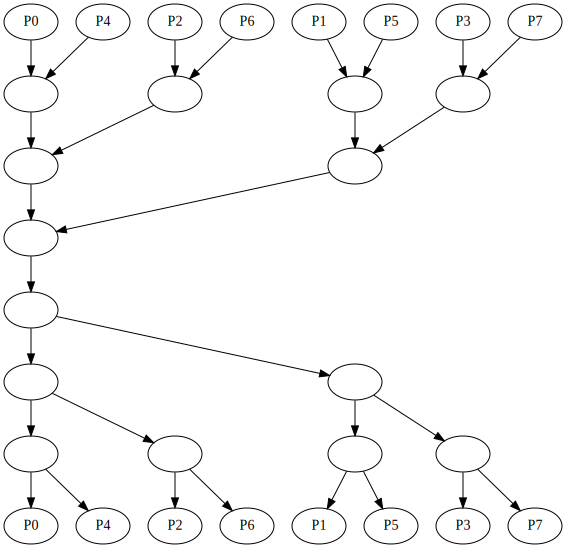

In [33]:
visualize_dc()

In [115]:
def visualize_dc_1():
    from graphviz import Digraph
    dot = Digraph(comment='Divide and Conquer')

    P0 = Digraph('Process_0')
    P0.node('P0-0', 'P0'); P0.node('P0-1', 'P0'); P0.node('P0-2', 'P0'); P0.node('P0-3', 'P0');
    P0.edge('P0-0','P0-1', arrowhead="none", weight="8"); 
    P0.edge('P0-1','P0-2', arrowhead="none", weight="6"); 
    P0.edge('P0-2','P0-3', arrowhead="none", weight="4"); 
    P1 = Digraph('Process_1')
    P1.node('P1-0', 'P1'); P1.node('P1-1', 'P1'); P1.node('P1-2', 'P1'); P1.node('P1-3', 'P1');
    P1.edge('P1-0','P1-1', arrowhead="none", weight="8"); 
    P1.edge('P1-1','P1-2', arrowhead="none", weight="6"); 
    P1.edge('P1-2','P1-3', arrowhead="none", weight="4"); 
    P2 = Digraph('Process_2')
    P2.node('P2-0', 'P2'); P2.node('P2-1', 'P2'); P2.node('P2-2', 'P2'); P2.node('P2-3', 'P2');
    dot.edge('P2-0','P2-1', arrowhead="none", weight="4"); 
    dot.edge('P2-1','P2-2', arrowhead="none", weight="4"); 
    dot.edge('P2-2','P2-3', arrowhead="none", weight="4"); 
    P3 = Digraph('Process_3')
    P3.node('P3-0', 'P3'); P3.node('P3-1', 'P3'); P3.node('P3-2', 'P3'); P3.node('P3-3', 'P3');

    P3.edge('P3-0','P3-1', arrowhead="none", weight="4"); 
    P3.edge('P3-1','P3-2', arrowhead="none", weight="4"); 
    P3.edge('P3-2','P3-3', arrowhead="none", weight="4"); 

    P4 = Digraph('Process_4')
    P4.node('P4-0', 'P4'); P4.node('P4-1', 'P4'); P4.node('P4-2', 'P4'); P4.node('P4-3', 'P4');
    P4.edge('P4-0','P4-1', arrowhead="none"); 
    P4.edge('P4-1','P4-2', arrowhead="none"); 
    P4.edge('P4-2','P4-3', arrowhead="none"); 

    P5 = Digraph('Process_5')
    P5.node('P5-0', 'P5'); P5.node('P5-1', 'P5'); P5.node('P5-2', 'P5'); P5.node('P5-3', 'P5');
    P5.edge('P5-0','P5-1', arrowhead="none"); 
    P5.edge('P5-1','P5-2', arrowhead="none"); 
    P5.edge('P5-2','P5-3', arrowhead="none"); 

    P6 = Digraph('Process_6')
    P6.node('P6-0', 'P6'); P6.node('P6-1', 'P6'); P6.node('P6-2', 'P6'); P6.node('P6-3', 'P6');
    P6.edge('P6-0','P6-1', arrowhead="none"); 
    P6.edge('P6-1','P6-2', arrowhead="none"); 
    P6.edge('P6-2','P6-3', arrowhead="none"); 

    P7 = Digraph('Process_7')
    P7.node('P7-0', 'P7'); P7.node('P7-1', 'P7'); P7.node('P7-2', 'P7'); P7.node('P7-3', 'P7');
    P7.edge('P7-0','P7-1', arrowhead="none"); 
    P7.edge('P7-1','P7-2', arrowhead="none"); 
    P7.edge('P7-2','P7-3', arrowhead="none");          

    dot.subgraph(P0); dot.subgraph(P1); dot.subgraph(P2); dot.subgraph(P3)
    dot.subgraph(P4); dot.subgraph(P5); dot.subgraph(P6); dot.subgraph(P7)    
    
    dot.edge('P0-0','P1-1'); dot.edge('P1-0','P0-1');
    dot.edge('P2-0','P3-1'); dot.edge('P3-0','P2-1');
    dot.edge('P4-0','P5-1'); dot.edge('P5-0','P4-1');
    dot.edge('P6-0','P7-1'); dot.edge('P7-0','P6-1');
    dot.edge('P0-1','P2-2'); dot.edge('P2-1','P0-2');
    dot.edge('P1-1','P3-2'); dot.edge('P3-1','P1-2');
    dot.edge('P4-1','P6-2'); dot.edge('P6-1','P4-2');
    dot.edge('P5-1','P7-2'); dot.edge('P7-1','P5-2');
   
    dot.edge('P0-2','P4-3'); dot.edge('P4-2','P0-3');
    dot.edge('P1-2','P5-3'); dot.edge('P5-2','P1-3');
    dot.edge('P2-2','P6-3'); dot.edge('P6-2','P2-3');
    dot.edge('P3-2','P7-3'); dot.edge('P7-2','P3-3');
    
    return dot

In [116]:
visualize_dc_1()

TypeError: subgraph() takes 2 positional arguments but 3 were given